In [1]:
from google.colab import files
import io
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from matplotlib import cm

In [2]:
# Mounting my google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
KS_results = pd.read_csv('/content/drive/My Drive/Redaction_SA/Final_figures/'
                         'Mut_SD_WGD/KS_modified_WGD.csv', index_col=0)

KS_results_1e5 = pd.read_csv('/content/drive/My Drive/Redaction_SA/Final_figures/'
                             'Mut_SD_WGD_1e5/KS_modified_1e5.csv', index_col=0)

KS_1e6 = KS_results[(KS_results['Model'] == 'Minimal') | (KS_results['Model'] == 'Mixed')].copy().reset_index(drop=True)

KS_1e5 = KS_results_1e5[(KS_results_1e5['Model'] == 'Minimal') | (KS_results_1e5['Model'] == 'Mixed')].copy().reset_index(drop=True)

In [4]:
# Replacing the 'Mixed' id by 'Cost-precision'
model_ids = {'Minimal': 'Minimal', 'Mixed': 'Cost-precision'}

for row in range(KS_1e6.shape[0]):
  KS_1e6.at[row, 'Model'] = model_ids[KS_1e6.at[row, 'Model']]

for row in range(KS_1e5.shape[0]):
  KS_1e5.at[row, 'Model'] = model_ids[KS_1e5.at[row, 'Model']]

In [5]:
# Df for each property
bm_vals_1e6 = KS_1e6[KS_1e6['Property'] == 'Transcription rate'].copy().reset_index(drop=True)
bp_vals_1e6 = KS_1e6[KS_1e6['Property'] == 'Translation rate'].copy().reset_index(drop=True)
prot_vals_1e6 = KS_1e6[KS_1e6['Property'] == 'Protein abundance'].copy().reset_index(drop=True)
div_vals_1e6 = KS_1e6[KS_1e6['Property'] == 'Divergence ratio'].copy().reset_index(drop=True)

bm_vals_1e5 = KS_1e5[KS_1e5['Property'] == 'Transcription rate'].copy().reset_index(drop=True)
bp_vals_1e5 = KS_1e5[KS_1e5['Property'] == 'Translation rate'].copy().reset_index(drop=True)
prot_vals_1e5 = KS_1e5[KS_1e5['Property'] == 'Protein abundance'].copy().reset_index(drop=True)
div_vals_1e5 = KS_1e5[KS_1e5['Property'] == 'Divergence ratio'].copy().reset_index(drop=True)

# Log10 of the p-values
bm_vals_1e6['KS p-value'] = np.log10(bm_vals_1e6['KS p-value'])
bp_vals_1e6['KS p-value'] = np.log10(bp_vals_1e6['KS p-value'])
prot_vals_1e6['KS p-value'] = np.log10(prot_vals_1e6['KS p-value'])
div_vals_1e6['KS p-value'] = np.log10(div_vals_1e6['KS p-value'])

bm_vals_1e5['KS p-value'] = np.log10(bm_vals_1e5['KS p-value'])
bp_vals_1e5['KS p-value'] = np.log10(bp_vals_1e5['KS p-value'])
prot_vals_1e5['KS p-value'] = np.log10(prot_vals_1e5['KS p-value'])
div_vals_1e5['KS p-value'] = np.log10(div_vals_1e5['KS p-value'])

Construction of the figure

In [6]:
# A function is defined to plot data with markers and colors for hue-levels
# without using seaborn

def hue_scatter(x, y, data, hue, palette, hue_order, markers, ax, size=None, 
                facecolors=None, alpha=None, linewidths=None):
  # Loop through hue orders and plot the points
  for level in hue_order:
    subset = data[data[hue] == level].copy().reset_index(drop=True)

    if facecolors == 'none':
      ax.scatter(subset[x], subset[y], s=size,
                 marker=markers[level], alpha=alpha, linewidths=linewidths,
                 label=level, facecolors=facecolors, edgecolors=palette[level])
      
    else:
      ax.scatter(subset[x], subset[y], s=size, c=palette[level],
                 marker=markers[level], alpha=alpha, linewidths=linewidths,
                 label=level, facecolors=facecolors)

In [7]:
# Adding new coordinates with jitter to the dataframes of Mood's
# p-values and KS statistics

# Numerical coordinates
sym_to_num = {'1/2':1, '1':2, '2':3, '3':4, '4':5, '5':6, '6':7, '7':8,
              '8':9, '9':10, '10':11}
for row in range(bm_vals_1e6.shape[0]):
  bm_vals_1e6.at[row, 'num'] = sym_to_num[bm_vals_1e6.at[row, 'Ratio']]
for row in range(bm_vals_1e5.shape[0]):
  bm_vals_1e5.at[row, 'num'] = sym_to_num[bm_vals_1e5.at[row, 'Ratio']]

for row in range(bp_vals_1e6.shape[0]):
  bp_vals_1e6.at[row, 'num'] = sym_to_num[bp_vals_1e6.at[row, 'Ratio']]
for row in range(bp_vals_1e5.shape[0]):
  bp_vals_1e5.at[row, 'num'] = sym_to_num[bp_vals_1e5.at[row, 'Ratio']]

for row in range(prot_vals_1e6.shape[0]):
  prot_vals_1e6.at[row, 'num'] = sym_to_num[prot_vals_1e6.at[row, 'Ratio']]
for row in range(prot_vals_1e5.shape[0]):
  prot_vals_1e5.at[row, 'num'] = sym_to_num[prot_vals_1e5.at[row, 'Ratio']]

for row in range(div_vals_1e6.shape[0]):
  div_vals_1e6.at[row, 'num'] = sym_to_num[div_vals_1e6.at[row, 'Ratio']]
for row in range(div_vals_1e5.shape[0]):
  div_vals_1e5.at[row, 'num'] = sym_to_num[div_vals_1e5.at[row, 'Ratio']]

# Add jitter
def jitter(x):
  return x + np.random.uniform(-0.1, 0.1)

bm_vals_1e6['num'] = bm_vals_1e6['num'].apply(lambda x: jitter(x))
bp_vals_1e6['num'] = bp_vals_1e6['num'].apply(lambda x: jitter(x))
prot_vals_1e6['num'] = prot_vals_1e6['num'].apply(lambda x: jitter(x))
div_vals_1e6['num'] = div_vals_1e6['num'].apply(lambda x: jitter(x))

bm_vals_1e5['num'] = bm_vals_1e5['num'].apply(lambda x: jitter(x))
bp_vals_1e5['num'] = bp_vals_1e5['num'].apply(lambda x: jitter(x))
prot_vals_1e5['num'] = prot_vals_1e5['num'].apply(lambda x: jitter(x))
div_vals_1e5['num'] = div_vals_1e5['num'].apply(lambda x: jitter(x))

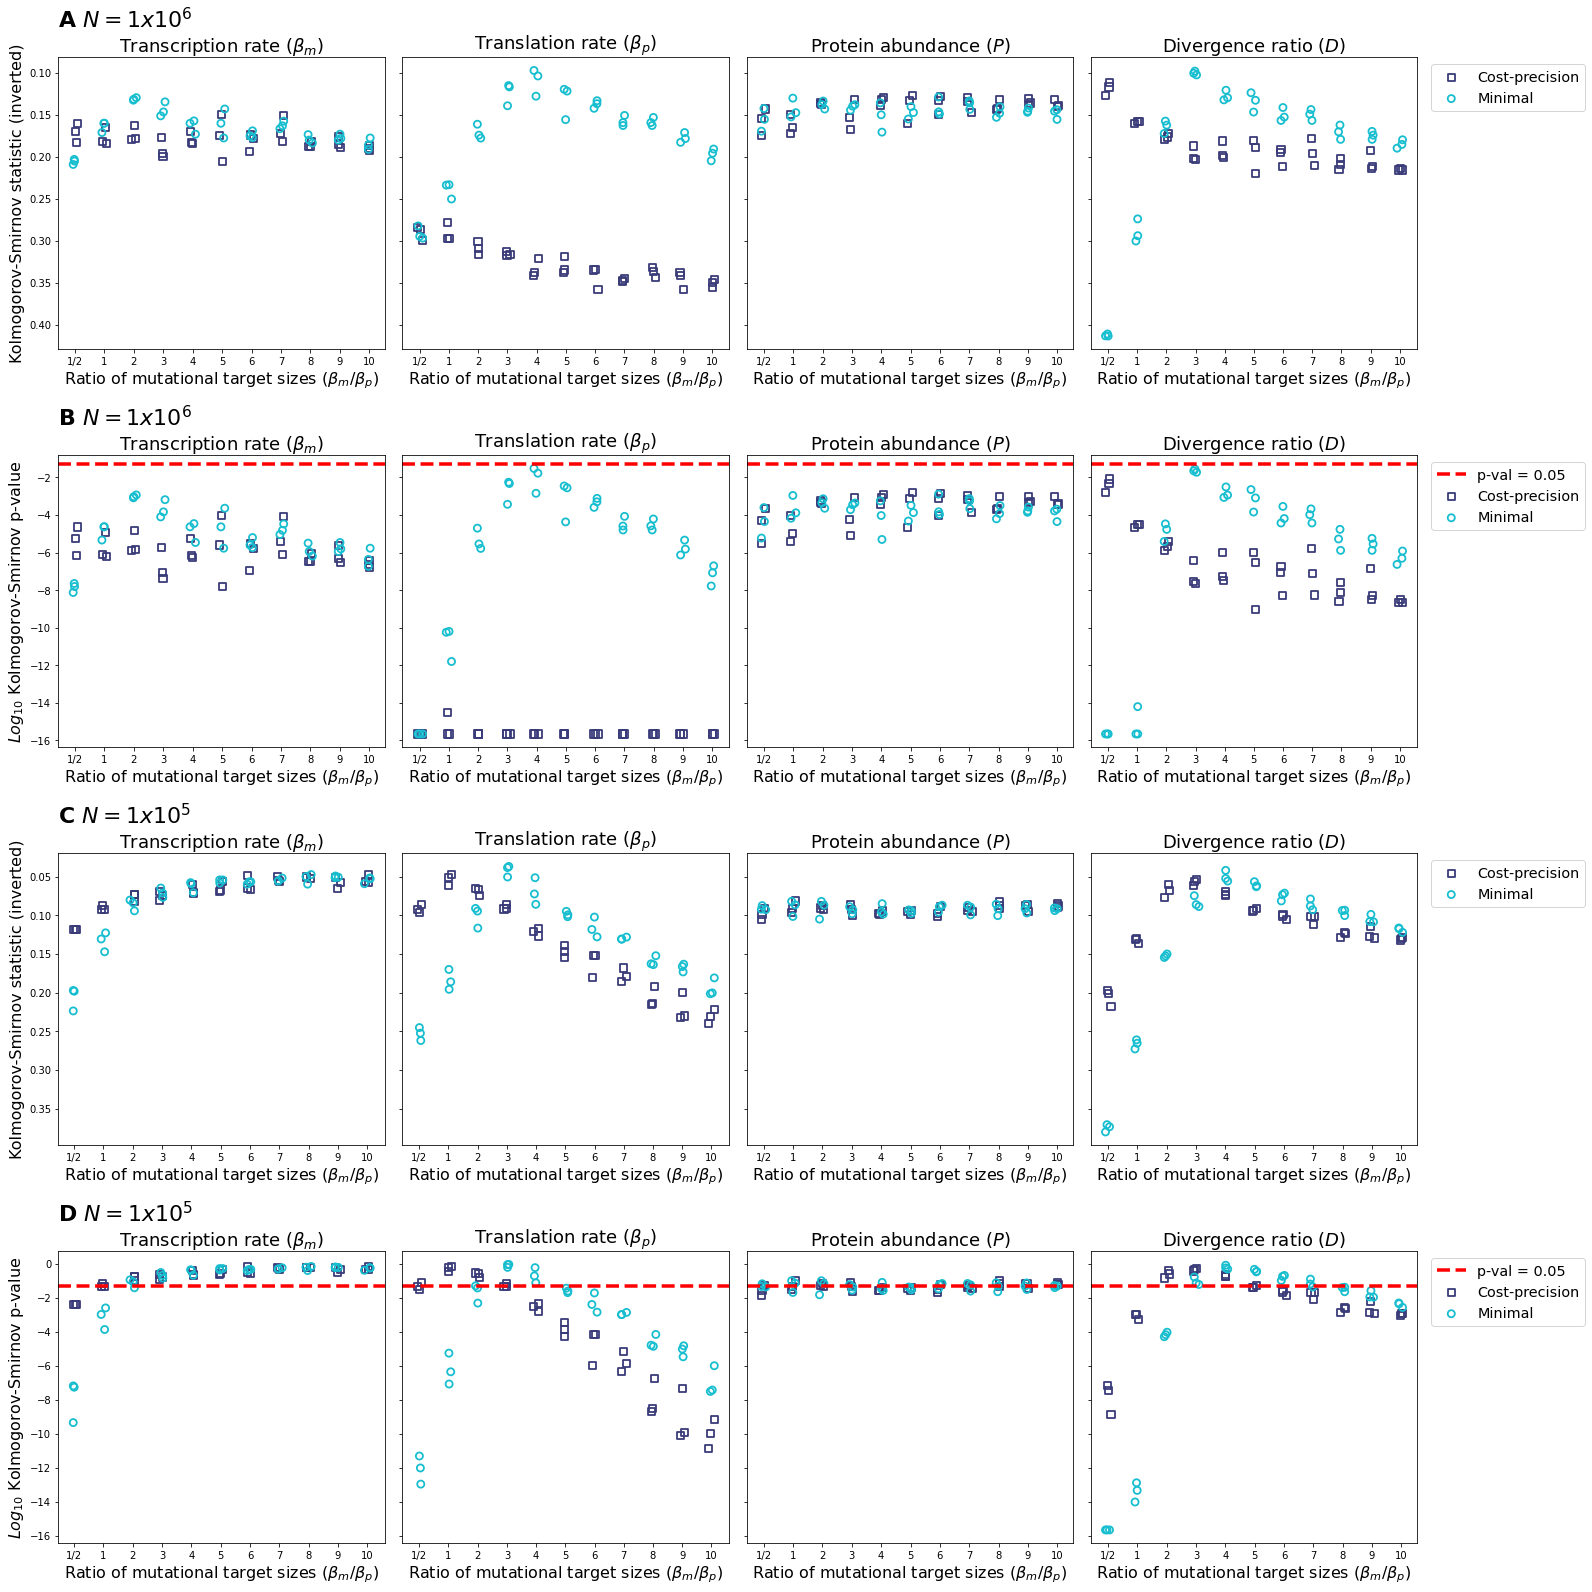

In [8]:
fig, axs = plt.subplots(4, 4, figsize=(22, 22), constrained_layout=True,
                        sharey='row')

# Parameters for the scatterplots
labels = ['1/2', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

size = 50

palette = {'Cost-precision': cm.tab20b.colors[0], 'Minimal': cm.tab10.colors[9]}
hue_order = ['Cost-precision', 'Minimal']
markers = {'Cost-precision': 's', 'Minimal':'o'}

facecolors = 'none'

linewidths = 1.8

# 1) Swarmplots of Ks statistics for N = 10^6

scatter1 = hue_scatter('num', 'KS stats', bm_vals_1e6, 'Model', palette, 
                      hue_order, markers, axs[0,0], size=size, 
                      facecolors=facecolors, linewidths=linewidths)

plt.sca(axs[0,0]) 
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
axs[0,0].set_xticklabels(['1/2', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

scatter2 = hue_scatter('num', 'KS stats', bp_vals_1e6, 'Model', palette, 
                      hue_order, markers, axs[0,1], size=size, 
                      facecolors=facecolors, linewidths=linewidths)

plt.sca(axs[0,1]) 
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
axs[0,1].set_xticklabels(['1/2', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

scatter3 = hue_scatter('num', 'KS stats', prot_vals_1e6, 'Model', palette, 
                      hue_order, markers, axs[0,2], size=size, 
                      facecolors=facecolors, linewidths=linewidths)

plt.sca(axs[0,2]) 
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
axs[0,2].set_xticklabels(['1/2', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

scatter4 = hue_scatter('num', 'KS stats', div_vals_1e6, 'Model', palette, 
                      hue_order, markers, axs[0,3], size=size, 
                      facecolors=facecolors, linewidths=linewidths)

plt.sca(axs[0,3]) 
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
axs[0,3].set_xticklabels(['1/2', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

axs[0,0].invert_yaxis()


# 2) Swarmplots of p-values for N = 10^6
scatter5 = hue_scatter('num', 'KS p-value', bm_vals_1e6, 'Model', palette, 
                      hue_order, markers, axs[1,0], size=size, 
                      facecolors=facecolors, linewidths=linewidths)

plt.sca(axs[1,0]) 
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
axs[1,0].set_xticklabels(['1/2', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

scatter6 = hue_scatter('num', 'KS p-value', bp_vals_1e6, 'Model', palette, 
                      hue_order, markers, axs[1,1], size=size, 
                      facecolors=facecolors, linewidths=linewidths)

plt.sca(axs[1,1]) 
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
axs[1,1].set_xticklabels(['1/2', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

scatter7 = hue_scatter('num', 'KS p-value', prot_vals_1e6, 'Model', palette, 
                      hue_order, markers, axs[1,2], size=size, 
                      facecolors=facecolors, linewidths=linewidths)

plt.sca(axs[1,2]) 
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
axs[1,2].set_xticklabels(['1/2', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

scatter8 = hue_scatter('num', 'KS p-value', div_vals_1e6, 'Model', palette, 
                      hue_order, markers, axs[1,3], size=size, 
                      facecolors=facecolors, linewidths=linewidths)

plt.sca(axs[1,3]) 
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
axs[1,3].set_xticklabels(['1/2', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

# 3) Swarmplots of Ks statistics for N = 10^5

scatter9 = hue_scatter('num', 'KS stats', bm_vals_1e5, 'Model', palette, 
                      hue_order, markers, axs[2,0], size=size, 
                      facecolors=facecolors, linewidths=linewidths)

plt.sca(axs[2,0]) 
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
axs[2,0].set_xticklabels(['1/2', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

scatter10 = hue_scatter('num', 'KS stats', bp_vals_1e5, 'Model', palette, 
                      hue_order, markers, axs[2,1], size=size, 
                      facecolors=facecolors, linewidths=linewidths)

plt.sca(axs[2,1]) 
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
axs[2,1].set_xticklabels(['1/2', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

scatter11 = hue_scatter('num', 'KS stats', prot_vals_1e5, 'Model', palette, 
                      hue_order, markers, axs[2,2], size=size, 
                      facecolors=facecolors, linewidths=linewidths)

plt.sca(axs[2,2]) 
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
axs[2,2].set_xticklabels(['1/2', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

scatter12 = hue_scatter('num', 'KS stats', div_vals_1e5, 'Model', palette, 
                      hue_order, markers, axs[2,3], size=size, 
                      facecolors=facecolors, linewidths=linewidths)

plt.sca(axs[2,3]) 
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
axs[2,3].set_xticklabels(['1/2', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

# Invert the axes
axs[2,0].invert_yaxis()

# 4) Swarmplots of p-values for N = 10^5

scatter13 = hue_scatter('num', 'KS p-value', bm_vals_1e5, 'Model', palette, 
                      hue_order, markers, axs[3,0], size=size, 
                      facecolors=facecolors, linewidths=linewidths)

plt.sca(axs[3,0]) 
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
axs[3,0].set_xticklabels(['1/2', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

scatter14 = hue_scatter('num', 'KS p-value', bp_vals_1e5, 'Model', palette, 
                      hue_order, markers, axs[3,1], size=size, 
                      facecolors=facecolors, linewidths=linewidths)

plt.sca(axs[3,1]) 
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
axs[3,1].set_xticklabels(['1/2', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

scatter15 = hue_scatter('num', 'KS p-value', prot_vals_1e5, 'Model', palette, 
                      hue_order, markers, axs[3,2], size=size, 
                      facecolors=facecolors, linewidths=linewidths)

plt.sca(axs[3,2]) 
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
axs[3,2].set_xticklabels(['1/2', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

scatter16 = hue_scatter('num', 'KS p-value', div_vals_1e5, 'Model', palette, 
                      hue_order, markers, axs[3,3], size=size, 
                      facecolors=facecolors, linewidths=linewidths)

plt.sca(axs[3,3]) 
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
axs[3,3].set_xticklabels(['1/2', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

# Line at p=0.05
for ax in [axs[1,0], axs[1,1], axs[1,2], axs[1,3], 
           axs[3,0], axs[3,1], axs[3,2], axs[3,3]]:

  ax.axhline(y=np.log10(0.05), c='red', linestyle='--', label='p-val = 0.05',
             linewidth=3.5)

# Add legends
axs[0, 3].legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize='x-large')
axs[1, 3].legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize='x-large')
axs[2, 3].legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize='x-large')
axs[3, 3].legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize='x-large')


# Axes labels for all
for ax in [axs[0,0], axs[0,1], axs[0,2], axs[0,3],
           axs[1,0], axs[1,1], axs[1,2], axs[1,3],
           axs[2,0], axs[2,1], axs[2,2], axs[2,3],
           axs[3,0], axs[3,1], axs[3,2], axs[3,3],]:
  ax.set_xlabel(r"Ratio of mutational target sizes ($\beta_m$/$\beta_p$)", 
                fontsize=16)
  ax.set_ylabel('')

axs[0,0].set_ylabel(r"Kolmogorov-Smirnov statistic (inverted)", fontsize=16)
axs[1,0].set_ylabel(r"$Log_{10}$ Kolmogorov-Smirnov p-value", fontsize=16)

axs[2,0].set_ylabel(r"Kolmogorov-Smirnov statistic (inverted)", fontsize=16)
axs[3,0].set_ylabel(r"$Log_{10}$ Kolmogorov-Smirnov p-value", fontsize=16)

# Plot titles
axs[0,0].set_title(r"Transcription rate ($\beta_m$)", fontsize=18)
axs[0,1].set_title(r"Translation rate ($\beta_p$)", fontsize=18)
axs[0,2].set_title(r"Protein abundance ($P$)", fontsize=18)
axs[0,3].set_title(r"Divergence ratio ($D$)", fontsize=18)

axs[1,0].set_title(r"Transcription rate ($\beta_m$)", fontsize=18)
axs[1,1].set_title(r"Translation rate ($\beta_p$)", fontsize=18)
axs[1,2].set_title(r"Protein abundance ($P$)", fontsize=18)
axs[1,3].set_title(r"Divergence ratio ($D$)", fontsize=18)

axs[2,0].set_title(r"Transcription rate ($\beta_m$)", fontsize=18)
axs[2,1].set_title(r"Translation rate ($\beta_p$)", fontsize=18)
axs[2,2].set_title(r"Protein abundance ($P$)", fontsize=18)
axs[2,3].set_title(r"Divergence ratio ($D$)", fontsize=18)

axs[3,0].set_title(r"Transcription rate ($\beta_m$)", fontsize=18)
axs[3,1].set_title(r"Translation rate ($\beta_p$)", fontsize=18)
axs[3,2].set_title(r"Protein abundance ($P$)", fontsize=18)
axs[3,3].set_title(r"Divergence ratio ($D$)", fontsize=18)

# Add subfigures A and B identifiers
axs[0,0].annotate(r"A $N = 1 x 10^6$", (0, 1.1), xycoords='axes fraction', 
                      fontsize=22, fontweight='bold')

axs[1,0].annotate(r"B $N = 1 x 10^6$", (0, 1.1), xycoords='axes fraction', 
                      fontsize=22, fontweight='bold')

axs[2,0].annotate(r"C $N = 1 x 10^5$", (0, 1.1), xycoords='axes fraction', 
                      fontsize=22, fontweight='bold')

axs[3,0].annotate(r"D $N = 1 x 10^5$", (0, 1.1), xycoords='axes fraction', 
                      fontsize=22, fontweight='bold')

FigS4 = plt.gcf()
FigS4.savefig('/content/drive/My Drive/Redaction_SA/Final_figures/SuppFig4.png', bbox_inches='tight')
FigS4.savefig('/content/drive/My Drive/Redaction_SA/Final_figures/SuppFig4.pdf', bbox_inches='tight')